# Binary Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

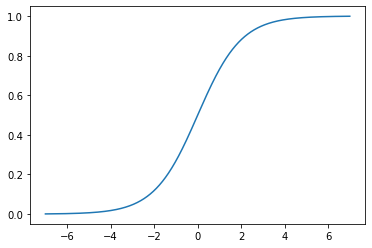

In [3]:
a=np.arange(-7, 7, 0.01)
b=1/(1+np.exp(-a))
plt.plot(a,b)
plt.show()

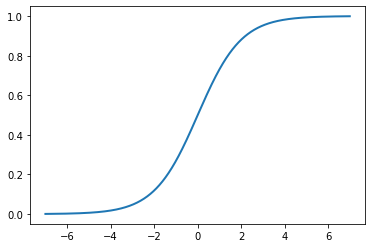

In [4]:
a=np.arange(-7, 7, 0.01)
b=1/(1+np.exp(-a))
plt.plot(a,b, lw=2)
plt.show()

In [5]:
#Make out dataset as binary class
iris = sns.load_dataset('iris')
n_data = iris.iloc[:, :2]    # sepal_length & sepal_width
n_data['class'] = np.where(iris['species'] == 'setosa', 1,0)  # y = iris['species']

n_X = n_data.drop('class', axis=1)
n_y = n_data['class']

In [6]:
print(n_data)

     sepal_length  sepal_width  class
0             5.1          3.5      1
1             4.9          3.0      1
2             4.7          3.2      1
3             4.6          3.1      1
4             5.0          3.6      1
..            ...          ...    ...
145           6.7          3.0      0
146           6.3          2.5      0
147           6.5          3.0      0
148           6.2          3.4      0
149           5.9          3.0      0

[150 rows x 3 columns]


In [7]:
print(n_y)

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: class, Length: 150, dtype: int32


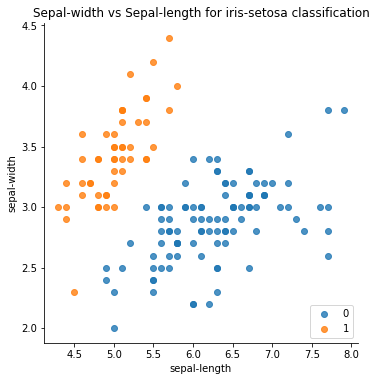

In [8]:
sns.lmplot( x = "sepal_length", y = "sepal_width", data=n_data, fit_reg=False, hue='class', legend=False) 
plt.legend(loc ='lower right')
plt.xlabel('sepal-length')
plt.ylabel('sepal-width')
plt.title('Sepal-width vs Sepal-length for iris-setosa classification')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
n_X_train, n_X_test, n_y_train, n_y_test = train_test_split(n_X, n_y, 
                                                                test_size=.2,random_state=7)

In [10]:
n_y_train.head()

126    0
79     0
22     1
139    0
74     0
Name: class, dtype: int32

In [11]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(n_X_train, n_y_train)
logr_y_pred=logr.predict(n_X_test)

In [12]:
logr.coef_

array([[-3.09468851,  3.06112084]])

In [13]:
logr.predict(n_X_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
logr.predict(n_X_test)[0:5,]

array([0, 0, 1, 0, 0])

In [15]:
logr.predict_proba(n_X_test)[0:5,]

array([[0.86597123, 0.13402877],
       [0.57894718, 0.42105282],
       [0.0794398 , 0.9205602 ],
       [0.71857228, 0.28142772],
       [0.57485049, 0.42514951]])

In [16]:
logr.predict_proba(n_X_test)

array([[0.86597123, 0.13402877],
       [0.57894718, 0.42105282],
       [0.0794398 , 0.9205602 ],
       [0.71857228, 0.28142772],
       [0.57485049, 0.42514951],
       [0.41970558, 0.58029442],
       [0.9905699 , 0.0094301 ],
       [0.86479811, 0.13520189],
       [0.05936734, 0.94063266],
       [0.94272537, 0.05727463],
       [0.98715089, 0.01284911],
       [0.7212796 , 0.2787204 ],
       [0.0248989 , 0.9751011 ],
       [0.98291329, 0.01708671],
       [0.17873625, 0.82126375],
       [0.77791776, 0.22208224],
       [0.99719099, 0.00280901],
       [0.95718177, 0.04281823],
       [0.04483692, 0.95516308],
       [0.04455028, 0.95544972],
       [0.92234652, 0.07765348],
       [0.98723576, 0.01276424],
       [0.9421792 , 0.0578208 ],
       [0.99028347, 0.00971653],
       [0.99723761, 0.00276239],
       [0.8980063 , 0.1019937 ],
       [0.95690577, 0.04309423],
       [0.92162217, 0.07837783],
       [0.92234652, 0.07765348],
       [0.98262911, 0.01737089]])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(n_y_test, logr_y_pred)

1.0

# Exercise - breast_cancer

# Question 0
How many features does the breast cancer dataset have?

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [19]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

# Question 1
Convert the sklearn.dataset cancer to a DataFrame.



In [20]:
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target']= pd.Series(cancer.target)
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Question 2
What is the class distribution? (i.e. how many instances of malignant and how many benign?)

In [21]:
df_cancer['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

# Question 3
Split the DataFrame into X (the data) and y (the labels).

In [22]:
X_cancer = df_cancer.drop('target', axis=1)

In [23]:
y_cancer = df_cancer['target']

In [24]:
X_cancer.shape

(569, 30)

# Question 4
Using train_test_split, split X and y into training and test sets (X_train, X_test, y_train, and y_test).

Set the random number generator state to 0 using random_state = 0

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_cancer, y_cancer, random_state=0)

# Question 5
Using LogisticRegression, fit your model with X_train, y_train.

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logr = LogisticRegression()
logr.fit(Xtrain, ytrain)

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Question 6
Using your logistic regression model, predict the class label.

In [28]:
ytest_pred=logr.predict(Xtest)

In [29]:
print(ytest_pred)

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


In [30]:
ytrain_pred=logr.predict(Xtrain)

# Question 7
Find the score (mean accuracy) of your logistic regression model using X_test and y_test.

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ytest_pred)  

0.9440559440559441

In [34]:
accuracy_score(ytrain, ytrain_pred)

0.9436619718309859